In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact,interactive #Used in Question 3
from ipywidgets import fixed
import scipy # Used in Question 4
from scipy.interpolate import CubicSpline

Question 1

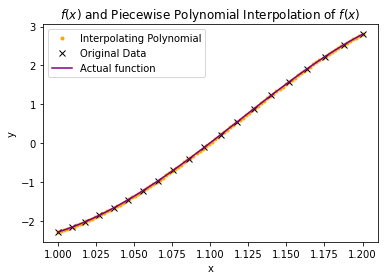

In [2]:
def PiecewisePoly(Ndeg, x0, y0, x_j):                      
    MM = Ndeg + 1                                          # degree + 1 = number of points to find
    N_interpolant = len(x0) - Ndeg                         # number of polynomials to get 
    pts = np.arange(Ndeg+1) + np.arange(N_interpolant).reshape(N_interpolant,1)  # small set of x points
    
    a = np.zeros((Ndeg+1,N_interpolant))
    pows = (MM-1-np.arange(MM)).reshape(MM,1)         
    
    for i in range(N_interpolant):
        A = np.vander(x0[pts[i,:]])
        a[:,i] = np.linalg.solve(A,y0[pts[i,:]])     #vander + solving for small set of x points
    
    y = np.empty_like(x_j) 
    pows = Ndeg-np.arange(MM)                        #putting powers in correct order
    
    for n in range(len(x_j)):
        if((x_j[n]<x0).all()):
            k=0
        elif((x_j[n]>x0).all()):
            k=len(x0)-1
        else:             # find k for x_i, accounting for the possibility that x_i=x_k
            k = np.where(((x_j[n]<x0[1:]) & (x_j[n]>=x0[:-1])) | 
                         ((x0[1:]==x_j[n]) & (x_j[n]>x0[:-1])))[0][0]
     
        j = k - Ndeg//2    
        j = max(0,j)
        j = min(j,N_interpolant-1)
        
        y[n] = np.sum(a[:,j]*x_j[n]**pows)  # obtain new data point
        
    return y

# Testing our function with a given function and uneven data points. 
def f(x):
    return np.exp(x)*np.cos(10*x)

N = 20
r0 = np.linspace(0,1/6,N)

x1 = 1/(1-r0) # coordinate transformation to test uneven spacing
y1 = f(x1)

# Evaluation points
x2 = np.linspace(x1[0],x1[-1],100) #changed start and ending points to be within the range of x1 to avoid extrapolation
Y = PiecewisePoly(10, x1, y1, x2)

# Plotting our Piecewise polynomial and comparingit to the actual function

plt.plot(x2, Y, ".", color = "orange",label="Interpolating Polynomial")
plt.plot(x1, y1, "x", color = "black",label="Original Data")
plt.plot(x2, f(x2), color = "purple",label="Actual function")    
plt.xlabel("x")
plt.ylabel("y")
plt.title("$f(x)$ and Piecewise Polynomial Interpolation of $f(x)$ ")
plt.legend()
plt.show()


Question 2

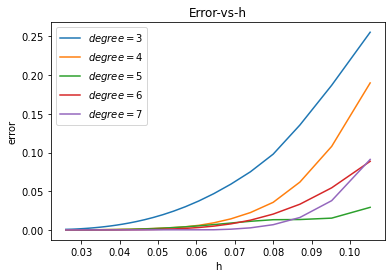

In [3]:
# Creating a funciton to return the maximum error 
def error_function(N, f, a, b, deg):
    
    x1 = np.linspace(a, b, N)
    y1 = f(x1)
 
    evalpts = np.linspace(a, b, 100)
    
    # deleting points in evalpts if they are equal to x1
    for i in range(len(x1)):
        if (evalpts[i] == x1[i]):
            np.delete(evalpts, i)

    Y = PiecewisePoly(deg, x1, y1, evalpts)
    
    max_error = max(abs(f(evalpts) - Y))
    
    return max_error


# Function to plot the error considering degree of the piecewise poly
def PlotError(deg):
    X = []
    Y = [] 
    for N in range(20, 80, 2):
    
        a = 0
        b = 2
    
        h = (b-a)/(N-1)
    
        X.append(h)
        Y.append(error_function(N, f, a, b, deg))
    
    plt.plot(X, Y,label=f'$degree={deg}$')
    plt.xlabel("h")
    plt.ylabel("error")
    plt.title("Error-vs-h")

# Plotting degrees 3 to 7
for i in range(3, 8):
    PlotError(i)
    plt.legend()

Question 3

In [4]:
#Defining the function and knots
f = lambda X: np.e**X*np.cos(10*X)

M = 11
x0 = np.linspace(1,2,M)
y0 = f(x0)

N = 101
x = np.linspace(1,2,N) 

#Returns: Correct interpolation points depending on the number of degrees desired
def get_points(x0, d):
    startIndex = (len(x0)-d)//2 
    return x0[startIndex:startIndex+d]

#Returns the desired polynomial
def make_poly(x,x0,d):
    xorder = get_points(x0, d) #obtains the points at which we perform interpolation
    yorder = f(xorder)
    
    A = np.vander(xorder)                  # construct the Vandermode matrix
    coeff = np.linalg.solve(A,yorder)      # the first term is the coefficient of the highest order

    J = len(xorder)
    
    pows = (J-1-np.arange(J)).reshape(J,1)         # these are the exponents required
    xnew = np.reshape(x,(1,N))                     # reshape for the broadcast
    y = np.sum((xnew**pows)*coeff.reshape(J,1),axis=0)
    
    return y

#Plots all elements together
def plot_poly(x0,y0,x,d):              
    # x0, y0 are the knots; x is the continuous domain; d is the degree of the polynomial
    plt.plot(x,f(x),label = 'f(x)') #plotting f(x)
    plt.plot(x,make_poly(x,x0,d+1),label = 'poly interpolated data') #plotting the langrange interpolation
    plt.plot(get_points(x0,d),f(get_points(x0,d)),'bo') #plotting the knots
    plt.ylim(-20, 20)
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Polynomial Interpolation with Varying Number of Knots, d")
    
    return

interactive(plot_poly, x0 = fixed(x0), y0 = fixed(y0),x = fixed(x), d = (1, 10))

interactive(children=(IntSlider(value=5, description='d', max=10, min=1), Output()), _dom_classes=('widget-int…

Question 4

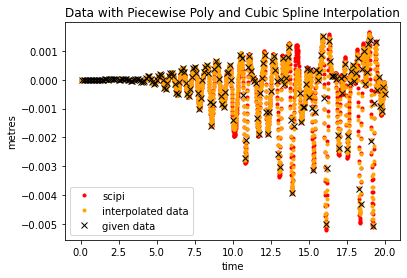

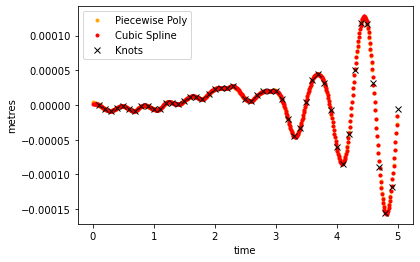

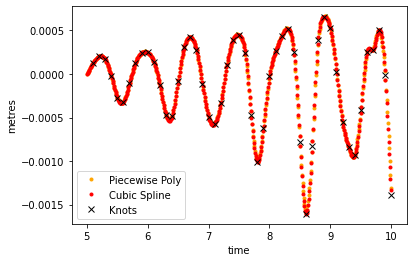

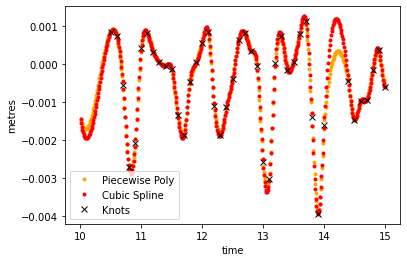

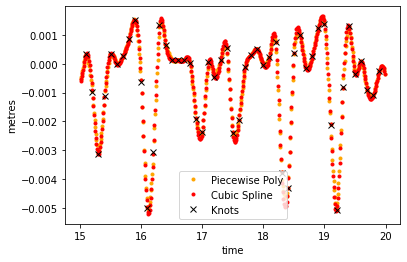

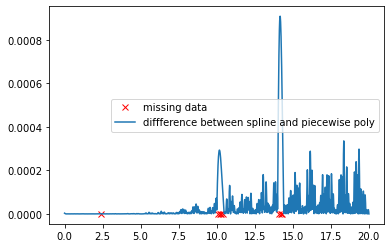

In [6]:



data1 = np.loadtxt('wave_data1.txt')
data1.shape
t = data1[0]
xi = data1[1]
missing_times = np.array([])

for i in range(1,len(t)):
    if t[i] == 20: #need the index of time = 20s for later in the question
        t20 = i
    diff = round(t[i] - t[i-1], 1)
    if diff > 0.1:
        nt = t[i-1]
        for j in range(1,int(10*diff)):
            missing_times = np.append(missing_times, nt + j/10) 

#Need Data from t <= 20s
t0 = t[:t20+1]
xi0 = xi[:t20+1]
N = 2000
tj = np.linspace(0,20, 2000) #0.01 s interval from 0-20 seconds

xi_inter = PiecewisePoly(3, t0, xi0, tj)
xi_spl = CubicSpline(t0,xi0)(tj)

fig = plt.figure("initial data")
ax = fig.add_subplot(1, 1, 1)

ax.plot(tj,xi_spl, ".", color = "red", label = 'scipi')
ax.plot(tj, xi_inter, ".", color = "orange", label = 'interpolated data')
ax.plot(t0, xi0, "x", color = "black", label = 'given data')
ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('metres')
ax.set_title('Data with Piecewise Poly and Cubic Spline Interpolation')
def truncated_data_indices(x, start, stop):
    xc = np.copy(x)
    lower = start*np.ones(len(x))
    upper = stop*np.ones(len(x))
    broad = ((x > lower) & (x < upper))
    xc *= broad
    indxs = np.nonzero(xc)
    return indxs[0][0], indxs[0][-1] +1
def plotbetween(x, y, start, stop, figure, label, color, style):
    ind = truncated_data_indices(x, start, stop)
    x_new = x[ind[0]:ind[1]]
    y_new = y[ind[0]:ind[1]]
    figure.plot(x_new,y_new, style, label = label, color = color)
    
def finalplot(start, stop, figure):
    plotbetween(tj, xi_inter, start, stop, figure, 'Piecewise Poly', 'orange', '.')
    plotbetween(tj, xi_spl, start, stop, figure, 'Cubic Spline', 'red', '.')
    plotbetween(t0, xi0, start, stop, figure, 'Knots', 'black', 'x' )
    return

#plotting between t= 0 and  t = 5 for bettter resolution:

znf_fig = plt.figure('zero and five')
znf_ax = znf_fig.add_subplot(1,1,1)

finalplot(0,5, znf_ax)
znf_ax.set_xlabel('time')
znf_ax.set_ylabel('metres')
znf_ax.legend()

#plotting between t= 5 and t=10
ft_fig = plt.figure('five and ten')
ft_ax = ft_fig.add_subplot(1,1,1)

finalplot(5,10, ft_ax)
ft_ax.set_xlabel('time')
ft_ax.set_ylabel('metres')
ft_ax.legend()

#Plotting between t= 9 and t = 15

naf_fig = plt.figure('nine and fifteen')
naf_ax = naf_fig.add_subplot(1,1,1)

finalplot(10,15, naf_ax)
naf_ax.set_xlabel('time')
naf_ax.set_ylabel('metres')
naf_ax.legend()


#Plotting between t= 15 and t = 20
fnt_fig = plt.figure('fifteen and twenty')
fnt_ax = fnt_fig.add_subplot(1,1,1)
fnt_ax.set_xlabel('time')
fnt_ax.set_ylabel('metres')
finalplot(15, 20, fnt_ax)
fnt_ax.legend()


#Plotting Error:

erfig = plt.figure("difference")
erax = erfig.add_subplot(1, 1, 1)
diff = np.absolute(xi_spl - xi_inter)
z = np.zeros(len(missing_times))
erax.plot(missing_times, z, "x", label = 'missing data', color = 'red')
erax.plot(tj, diff, label = 'diffference between spline and piecewise poly')
erax.legend()


plt.show()


In [ ]:
int_fig = plt.figure("int")
int_ax = int_fig.add_subplot(1, 1, 1)

interactive(finalplot, start = fixed(1), stop = (11, 20), figure = fixed(int_ax))